# Asia Network in Python
First phase is to load in the required libraries.

In [1]:
import bnlearn as bn 
import tabulate


In [2]:
# Load example
df = bn.import_example('asia')

[bnlearn] >Extracting files..


## Get the base model in Python

In [3]:
base_dag = bn.import_DAG('asia')

[bnlearn] >Import <asia>
[bnlearn] >Loading bif file <c:\Users\rrobe\AppData\Local\Programs\Python\Python39\lib\site-packages\bnlearn\data\asia.bif>
[bnlearn] >Check whether CPDs sum up to one.
[bnlearn] >Check whether CPDs associated with the nodes are consistent: True


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


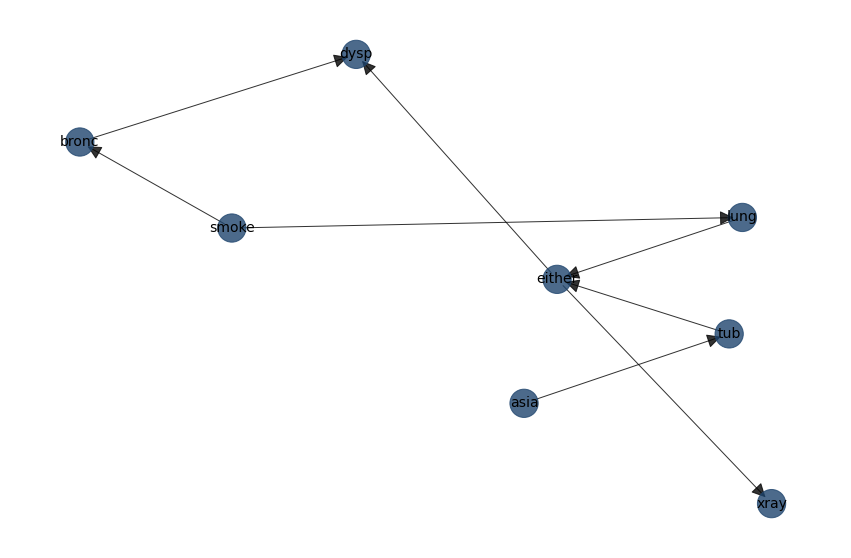

{'pos': {'asia': array([ 0.02809575, -0.57018703]),
  'tub': array([ 0.25832474, -0.27270254]),
  'smoke': array([-0.29986462,  0.18092432]),
  'lung': array([0.27314501, 0.22633985]),
  'bronc': array([-0.47049124,  0.54955733]),
  'either': array([ 0.06518226, -0.03898552]),
  'xray': array([ 0.30591408, -1.        ]),
  'dysp': array([-0.16030599,  0.92505359])},
 'G': <networkx.classes.digraph.DiGraph at 0x2b2eac7e8b0>,
 'node_properties': {'asia': {'node_color': '#1f456e', 'node_size': 800},
  'tub': {'node_color': '#1f456e', 'node_size': 800},
  'smoke': {'node_color': '#1f456e', 'node_size': 800},
  'lung': {'node_color': '#1f456e', 'node_size': 800},
  'bronc': {'node_color': '#1f456e', 'node_size': 800},
  'either': {'node_color': '#1f456e', 'node_size': 800},
  'xray': {'node_color': '#1f456e', 'node_size': 800},
  'dysp': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('asia', 'tub'): {'color': '#000000', 'weight': 1},
  ('tub', 'either'): {'color': '#000

In [18]:
bn.plot(base_dag)

In [5]:
base_model = bn.parameter_learning.fit(base_dag, df)
bn.structure_scores(base_model, df, scoring_method="bic")

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of asia:
+---------+-----------+
| asia(0) | 0.0545455 |
+---------+-----------+
| asia(1) | 0.945455  |
+---------+-----------+
[bnlearn] >CPD of bronc:
+----------+--------------------+--------------------+
| smoke    | smoke(0)           | smoke(1)           |
+----------+--------------------+--------------------+
| bronc(0) | 0.5899047961199928 | 0.3138229339223265 |
+----------+--------------------+--------------------+
| bronc(1) | 0.4100952038800072 | 0.6861770660776735 |
+----------+--------------------+--------------------+
[bnlearn] >CPD of dysp:
+---------+--------------------+-----+---------------------+
| bronc   | bronc(0)           | ... | bronc(1)            |
+---------+--------------------+-----+---------------------+
| either  | either(0)          | ... | either(1)           |
+---------+--------------------+-----+---------------------+
| dysp(0) | 0.7365930599369085 | ... | 0.1191652937

{'bic': -22472.468380946633}

In [3]:
# Take a look at the head of the dataframe
df.head()

,asia,tub,smoke,lung,bronc,either,xray,dysp
0,1,1,1,1,0,1,1,0
1,1,1,0,1,0,1,1,0
2,1,1,1,1,1,1,1,1
3,1,1,0,1,0,1,1,0
4,1,1,0,1,1,1,1,1


In [3]:
# Check a the description of the dataframe to compare to the one used in R to make sure it is the same data
df.describe()

,asia,tub,smoke,lung,bronc,either,xray,dysp
count,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.989400,0.99010,0.496000,0.94570,0.547200,0.936200,0.891200,0.559400
std,0.102414,0.09901,0.500009,0.22662,0.497792,0.244409,0.311404,0.496484
min,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.00000,0.000000,1.00000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.00000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


# TODO
how do i create a clearer network DAG using the properties in the plot method

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


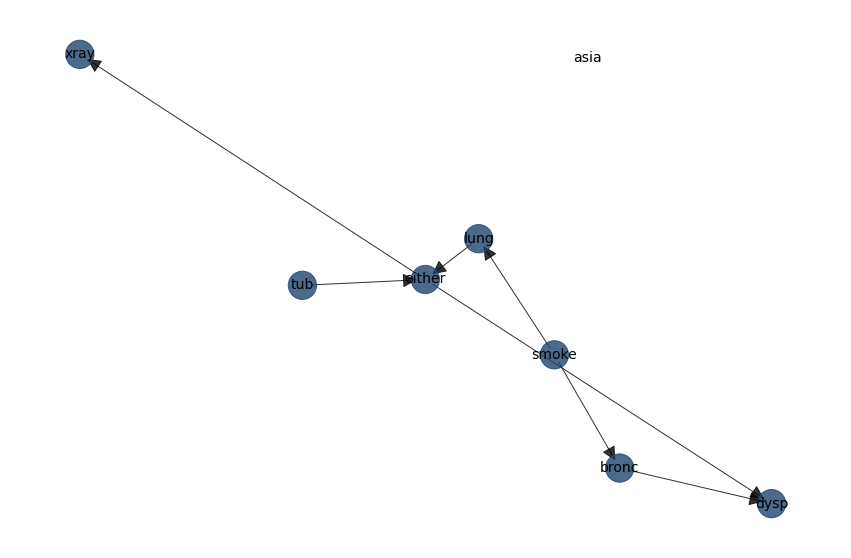

In [6]:
# Learn the structure of the Asia network using the hill climb algorithm
# Structure learning
hc_model = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
# Plot detected DAG
G = bn.plot(hc_model,)

In [7]:
bn.structure_scores(hc_model, df, scoring_method="bic")

[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).


{'bic': -22469.263194488864}

In [12]:
df.shape

(10000, 8)

In [2]:
# Read in the excel data to a dataframe r_df
from pandas import read_csv, read_excel
r_df = read_csv('asia.csv')
r_df.head()

,A,S,T,L,B,E,X,D
0,no,yes,no,no,yes,no,no,yes
1,no,yes,no,no,no,no,no,no
2,no,no,yes,no,no,yes,yes,yes
3,no,no,no,no,yes,no,no,yes
4,no,no,no,no,no,no,no,yes


### Expert view with R Dataset

[bnlearn] >bayes DAG created.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


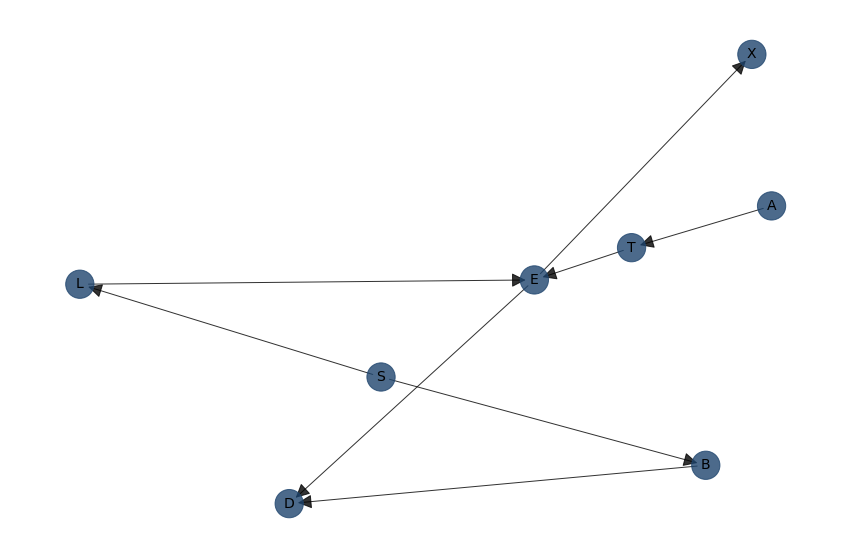

In [3]:
edges = [('A','T'), ('S','L'),('S','B'),('B','D'),('E','D'),('T','E'),('L','E'),('E','X')]
r_base_dag = bn.make_DAG(edges)
g_expert = bn.plot(r_base_dag) ## Check DAG is the same as R

In [4]:

r_model_expert = bn.parameter_learning.fit(r_base_dag, r_df)
bn.structure_scores(r_model_expert, r_df, scoring_method="bic")

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of A:
+--------+-----------+
| A(no)  | 0.909667  |
+--------+-----------+
| A(yes) | 0.0903333 |
+--------+-----------+
[bnlearn] >CPD of T:
+--------+---------------------+---------------------+
| A      | A(no)               | A(yes)              |
+--------+---------------------+---------------------+
| T(no)  | 0.9465005496518871  | 0.5350553505535055  |
+--------+---------------------+---------------------+
| T(yes) | 0.05349945034811286 | 0.46494464944649444 |
+--------+---------------------+---------------------+
[bnlearn] >CPD of S:
+--------+--------+
| S(no)  | 0.4975 |
+--------+--------+
| S(yes) | 0.5025 |
+--------+--------+
[bnlearn] >CPD of L:
+--------+---------------------+---------------------+
| S      | S(no)               | S(yes)              |
+--------+---------------------+---------------------+
| L(no)  | 0.904857621440536   | 0.8189054726368159  |
+--------+--------------------

{'bic': -11109.741872493616}

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


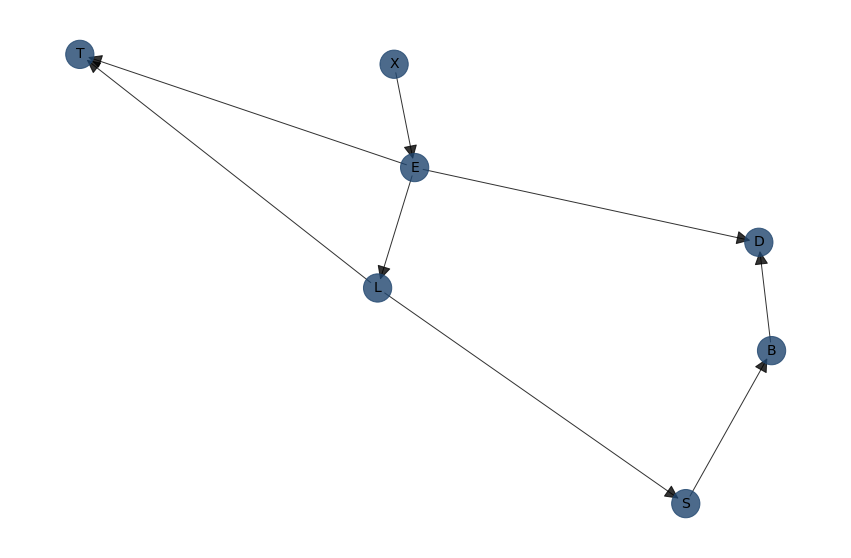

In [6]:
r_model_hc = bn.structure_learning.fit(r_df, methodtype='hc', scoretype='bic')
# Plot detected DAG
G = bn.plot(r_model_hc)

Using the same data in Python pulls provides a different network with the smaller number of data samples

In [7]:
bn.structure_scores(r_model_hc, r_df, scoring_method="bic")

[bnlearn] >Compute structure scores ['bic'] for model comparison (higher is better).


{'bic': -11111.350370516257}

In [14]:
# Inference on Expert
result_expert = bn.inference.fit(r_base_dag, variables= ['D'], evidence={'S':'yes', 'T':'yes'})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+-----+---------+
|    |   D |       p |
+====+=====+=========+
|  0 |   0 | 0.39403 |
+----+-----+---------+
|  1 |   1 | 0.60597 |
+----+-----+---------+


In [16]:
r_hc_dag = bn.parameter_learning.fit(r_model_hc, r_df)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of S:
+--------+---------------------+--------------------+
| L      | L(no)               | L(yes)             |
+--------+---------------------+--------------------+
| S(no)  | 0.5224371373307544  | 0.3421686746987952 |
+--------+---------------------+--------------------+
| S(yes) | 0.47756286266924564 | 0.6578313253012048 |
+--------+---------------------+--------------------+
[bnlearn] >CPD of B:
+--------+--------------------+---------------------+
| S      | S(no)              | S(yes)              |
+--------+--------------------+---------------------+
| B(no)  | 0.667001675041876  | 0.31840796019900497 |
+--------+--------------------+---------------------+
| B(yes) | 0.3329983249581239 | 0.681592039800995   |
+--------+--------------------+---------------------+
[bnlearn

In [18]:
#Inference on Hillclimb
result_hc = bn.inference.fit(r_hc_dag, variables= ['D'], evidence={'S':'yes', 'T':'yes'})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+-----+----------+
|    |   D |        p |
+====+=====+==========+
|  0 |   0 | 0.395826 |
+----+-----+----------+
|  1 |   1 | 0.604174 |
+----+-----+----------+
